## This Model Allows Sentiment Analysis using Support Vector Machine Algorithm

#### This model is comprised of different steps as listed below:
1. Importing Libraries
2. Data Loading
3. Data Cleaning
4. Data Preprocessing
5. Train Test Split
6. Model Training
7. Model Evaluation
8. Pickle Export

#### Importing Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import joblib

#### Data Load

In [56]:
df = pd.read_csv('Tweets.csv')  # Load dataset
df = df[['text', 'airline_sentiment']]  # Ensure these columns exist

#### Data Cleaning

In [57]:
print(df['airline_sentiment'].isnull().sum())

0


In [58]:
df = df.dropna(subset=['airline_sentiment'])
df['airline_sentiment'] = df['airline_sentiment'].map({
    'positive': 2,
    'neutral': 1,
    'negative': 0
})

#### Train Test Split

In [59]:
# Split dataset
X = df['text']
y = df['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y , test_size=0.33, random_state=42
)

#### Model Training

In [60]:
#model pipelining

model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1,2), stop_words='english')),
    ('svm', svm.SVC(kernel='linear', probability=True, class_weight='balanced'))])

In [61]:
#model training
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('svm',
                 SVC(class_weight='balanced', kernel='linear',
                     probability=True))])

#### Model Evaluation

In [ ]:
# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#Display model accuracy
print(f"Model Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

Model Accuracy: 0.7510

Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.79      0.83      3085
     neutral       0.51      0.64      0.57       984
    positive       0.67      0.73      0.70       763

    accuracy                           0.75      4832
   macro avg       0.69      0.72      0.70      4832
weighted avg       0.77      0.75      0.76      4832



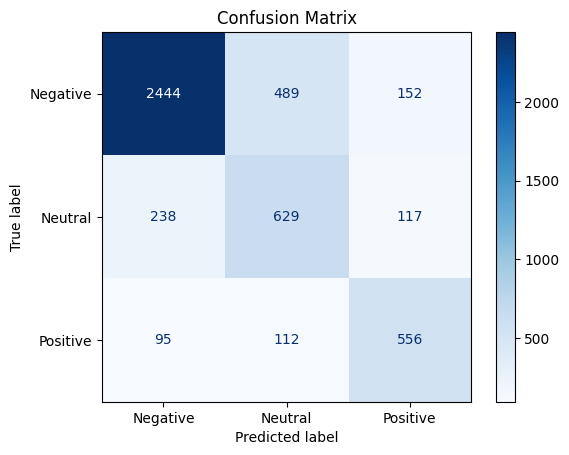

In [63]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                            display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### Model Export

In [64]:
# Save the trained model
joblib.dump(model, "SA_model.pkl")

['SA_model.pkl']